# Customer Segmentation

Customer segmentation is the process of dividing customers into groups based on common characteristics so companies can market to each group effectively and appropriately.

The most common ways in which businesses segment their customer base are:

- Demographic information, such as gender, age, familial and marital status, income, education, and occupation.
- Geographical information, which differs depending on the scope of the company. For localized businesses, this info might pertain to specific towns or counties. For larger companies, it might mean a customer’s city, state, or even country of residence.
- Psychographics, such as social class, lifestyle, and personality traits.
- Behavioral data, such as spending and consumption habits, product/service usage, and desired benefits.

### Dataset
https://archive.ics.uci.edu/ml/datasets/online+retail


### Data Set Information:

This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers

### Attribute Information:

- <b>InvoiceNo</b>: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.<br>
- <b>StockCode</b>: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
Description: Product (item) name. Nominal.<br>
- <b>Quantity</b>: The quantities of each product (item) per transaction. Numeric.<br>
- <b>InvoiceDate</b>: Invice Date and time. Numeric, the day and time when each transaction was generated.<br>
- <b>UnitPrice</b>: Unit price. Numeric, Product price per unit in sterling.<br>
- <b>CustomerID</b>: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.<br>
- <b>Country</b>: Country name. Nominal, the name of the country where each customer resides.<br>

# Exploratory Data Analysis

In [1]:
# Import Packages
import numpy as np
import pandas as pd
import datetime
import math
import matplotlib.pyplot as plt
#import matplotlib.mlab as mlab
import seaborn as sns
import sklearn.cluster as cluster
from sklearn.cluster import KMeans
#from sklearn.decomposition import PCA
#from sklearn.mixture import GMM

from sklearn.metrics import silhouette_samples, silhouette_score
color = sns.color_palette()
%matplotlib inline

In [2]:
# Read and Load Data
data = pd.read_csv('data.csv',encoding = 'unicode_escape')

In [3]:
# Display Data
data.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom

In [4]:
# Display Data
data.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom

In [5]:
# Dataset size
print('Number of rows   : ',data.shape[0])
print('Number of columns: ',data.shape[1])

Number of rows   :  541909
Number of columns:  8


In [6]:
# Total Missing data per column
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null object
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


Our dataset is composed of <b>541909</b> rows and <b>8</b> columns. When going through the columns, we notice that we have some missing values in the <b>CustomerID</b> column, as it only has <b>406829</b> values. <b>135080</b> CustomerID's are missing. Also the column <b>Description</b> has <b>1454</b> missing values. So, that should be considered when applying exploration to our dataset.

In [8]:
#exploring the unique values of each attribute
print("Number of transactions: ", data['InvoiceNo'].nunique())
print("Number of products: ",data['StockCode'].nunique())
print("Number of customers:", data['CustomerID'].nunique() )
print("Percentage of customers NA: ", round(data['CustomerID'].isnull().sum() * 100 / len(data),2),"%" )
print('Number of countries: ',data['Country'].nunique())

Number of transactions:  25900
Number of products:  4070
Number of customers: 4372
Percentage of customers NA:  24.93 %
Number of countries:  38


**Note**: The number of NA customers is quite large and that would impact the results.

This dataframe contains 8 variables that correspond to:

**InvoiceNo**: Invoice number. **Nominal**, a 6-digit integeral number uniquely assigned to each transaction. If this code starts with letter 'C', it indicates a cancellation. </br>

**StockCode**: Product (item) code. **Nominal**, a 5-digit integral number uniquely assigned to each distinct product. Description: Product (item) name. Nominal. </br>

**Quantity**: The quantities of each product (item) per transaction. **Numeric**.</br>

**InvoiceDate**: Invoice Date and time. **Numeric**, the day and time when each transaction was generated. </br>

**UnitPrice**: Unit price. **Numeric**, Product price per unit in sterling. </br>

**CustomerID**: Customer number. **Nominal**, a 5-digit integral number uniquely assigned to each customer. </br>

**Country**: Country name. **Nominal**, the name of the country where each customer resides.</br>

Now, let's have an idea about the quantitative data (Quantity & UnitPrice).

In [9]:
# Descriptive statistics summary
data.describe()

Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000

<b>The first thing to notice is that we have some negative values in our dataset. Maybe, this could mean that these quantities (with corresponding UnitPrice values) was returned or cancelled.</b>

### Description and Stock Codes

In [10]:
print('Total unique Stock Code  :',len(data.StockCode.unique()))
print('Total unique Descriptions:',len(data.Description.unique()))

Total unique Stock Code  : 4070
Total unique Descriptions: 4224


Description of items: We see that the descriptions are more then the stock code so there must be some stock code which have more than one decription


In [11]:
cat_des_df = data.groupby(["StockCode","Description"]).count().reset_index()

Stockcode which have more than one description

In [12]:
cat_des_df.StockCode.value_counts()[cat_des_df.StockCode.value_counts()>1].reset_index().head()


index  StockCode
0  20713          8
1  23084          7
2  21830          6
3  85175          6
4  21181          5

Example of one such stockcode:

In [13]:
data[data['StockCode'] == cat_des_df.StockCode.value_counts()[cat_des_df.StockCode.value_counts()>1]
      .reset_index()['index'][0]]['Description'].unique()

array(['JUMBO BAG OWLS', nan, 'wrongly marked. 23343 in box',
       'wrongly coded-23343', 'found', 'Found', 'wrongly marked 23343',
       'Marked as 23343', 'wrongly coded 23343'], dtype=object)

## Verify Assumption: Cancelled invoices


In [14]:
InvoiceNo_6_digits = []
InvoiceNo_7_digits = []
for element in data.InvoiceNo:
    if len(element) <= 6:
        InvoiceNo_6_digits.append(element)
    else:    
        InvoiceNo_7_digits.append(element)
        
print('Some sample InvoiceNo with 6 digits:',InvoiceNo_6_digits[:5])
print('Some sample InvoiceNo with 7 digits:',InvoiceNo_7_digits[:5])

Some sample InvoiceNo with 6 digits: ['536365', '536365', '536365', '536365', '536365']
Some sample InvoiceNo with 7 digits: ['C536379', 'C536383', 'C536391', 'C536391', 'C536391']


**Error in the data**: According to dataset description InvoiceNo is Numeric value but some InvoiceNo also starts with Letter C. If this code starts with letter 'C', it indicates a cancellation. Let's see if our assumption is correct about the negative quantity: -80995. We will look for the list of cancelled invoices and check if there is an invoice with that quantity.

In [15]:
# get cancelled transactions
cancelled_orders = data[data['InvoiceNo'].astype(str).str.contains('C')]
cancelled_orders.head()

InvoiceNo StockCode                       Description  Quantity  \
141   C536379         D                          Discount        -1   
154   C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235   C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236   C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237   C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   

         InvoiceDate  UnitPrice  CustomerID         Country  
141   12/1/2010 9:41      27.50     14527.0  United Kingdom  
154   12/1/2010 9:49       4.65     15311.0  United Kingdom  
235  12/1/2010 10:24       1.65     17548.0  United Kingdom  
236  12/1/2010 10:24       0.29     17548.0  United Kingdom  
237  12/1/2010 10:24       0.29     17548.0  United Kingdom

In [16]:
# search for transaction where quantity == -80995
cancelled_orders[cancelled_orders['Quantity']==-80995]

InvoiceNo StockCode                  Description  Quantity  \
540422   C581484     23843  PAPER CRAFT , LITTLE BIRDIE    -80995   

           InvoiceDate  UnitPrice  CustomerID         Country  
540422  12/9/2011 9:27       2.08     16446.0  United Kingdom

In [17]:
cancelled_orders[cancelled_orders['Quantity']>0]

Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country]
Index: []

As we expected, negative values in the Quantity column, mean that it's a cancelled quantity because we didn't find any positive value for orders where InvoiceNo contains the prefix C. </br>


### How much cancelled orders do we have?

In [18]:
#check how many rows our dataframe of cancelled orders contain#check h 
print("We have ",len(cancelled_orders), " cancelled orders.")
#percentage of cancelled orders in total orders
total_orders = data['InvoiceNo'].nunique()
cancelled_number = len(cancelled_orders)
print('Percentage of orders canceled: {}/{} ({:.2f}%) '.format(cancelled_number, total_orders,
                                                               cancelled_number/total_orders*100))

We have  9288  cancelled orders.
Percentage of orders canceled: 9288/25900 (35.86%) 


We have a large percentage of cancelled orders of **35%**. Studying these cancelled orders may help in preventing future cancellation. Let's first get an overview of the general customers purchase behavior and then dig deeper.

## Trend Analysis

### What's the average number of orders per customer?

In [19]:
# get unique InvoiceNo number per customer
groupby_customers = pd.DataFrame(data.groupby('CustomerID')['InvoiceNo'].nunique())
groupby_customers.describe()

InvoiceNo
count  4372.000000
mean      5.075480
std       9.338754
min       1.000000
25%       1.000000
50%       3.000000
75%       5.000000
max     248.000000

As we found in descriptive statistics that customers buy in average (mean) a quantity of 10. Are they from the same product? Let's examine how many products are purchased.

### What's the average number of unique items per order?

In [20]:
groupby_invoice = pd.DataFrame(data.groupby('InvoiceNo')['StockCode'].nunique())
groupby_invoice.columns=['productsNumber']
groupby_invoice.describe()

productsNumber
count    25900.000000
mean        20.510618
std         42.500488
min          1.000000
25%          2.000000
50%         10.000000
75%         23.000000
max       1110.000000

In [21]:
temp_df = data.groupby(['InvoiceNo','CustomerID'],as_index=False)['InvoiceDate'].count()
transaction_df = temp_df.rename(columns = {'InvoiceDate':'Number of products'})
transaction_df.head()

InvoiceNo  CustomerID  Number of products
0    536365     17850.0                   7
1    536366     17850.0                   2
2    536367     13047.0                  12
3    536368     13047.0                   4
4    536369     13047.0                   1

In [22]:
#transaction_df.describe()

In [23]:
groupby_ID = pd.DataFrame(data.groupby('CustomerID')['StockCode'].nunique())
groupby_ID.columns = ['ItemsPerCustomer']
groupby_ID.describe()

ItemsPerCustomer
count       4372.000000
mean          61.211116
std           85.425119
min            1.000000
25%           15.000000
50%           35.000000
75%           77.000000
max         1794.000000

As images speak more, let's see what the distribution of productsNumber tells us.

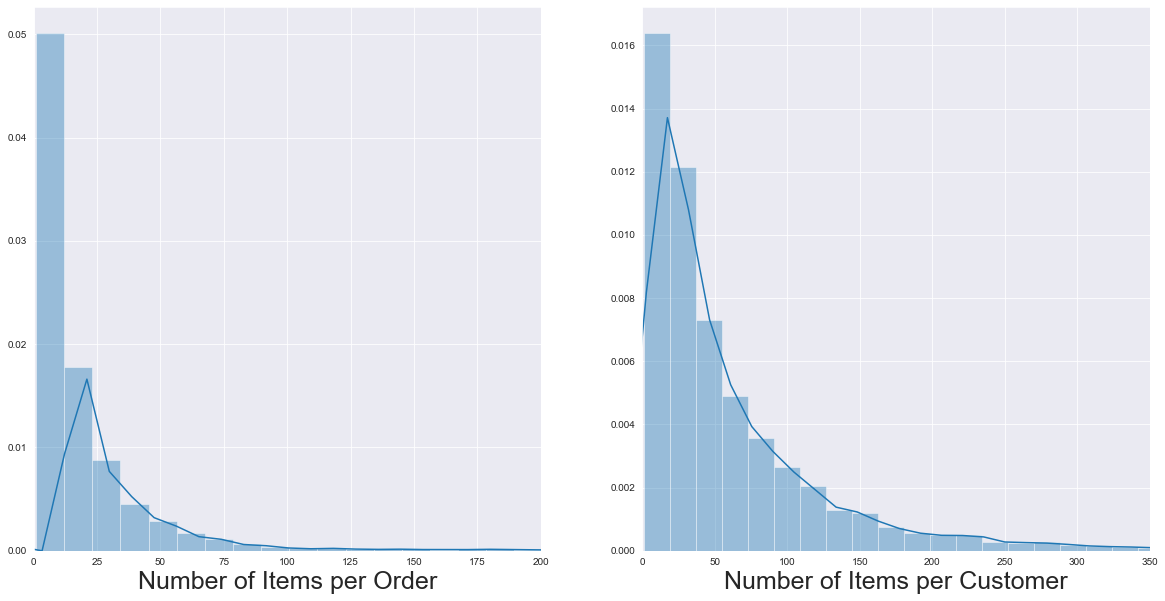

In [24]:
#Visualize the distribution of both
sns.set_style("darkgrid")
fig, ax = plt.subplots(1,2)
fig.set_size_inches(20, 10)
plt1 = sns.distplot(groupby_invoice['productsNumber'], ax=ax[0], bins=100)
plt1.set_xlim(0,200)
plt1.set_xlabel(xlabel='Number of Items per Order',fontsize=25)
plt2 = sns.distplot(groupby_ID['ItemsPerCustomer'], ax=ax[1], bins=100)
plt2.set_xlim(0,350)
plt2.set_xlabel(xlabel='Number of Items per Customer',fontsize=25)
plt.show()

We have skewed left distribution for both plots. The average number of items per order is around 20.5 and the average number of items per customer is 60.71.

### Top Sales by Country

In [25]:
# Unique Countries
print('Total Unique Countries:',len(pd.unique(data.Country)))

Total Unique Countries: 38


In [26]:
##### Unique countries with value count.
df = pd.DataFrame(data.Country.value_counts())
df.columns = ['Count']
df['CustomerPercentage'] = (df['Count']/len(data))*100
df.head(10)

Count  CustomerPercentage
United Kingdom  495478           91.431956
Germany           9495            1.752139
France            8557            1.579047
EIRE              8196            1.512431
Spain             2533            0.467422
Netherlands       2371            0.437527
Belgium           2069            0.381798
Switzerland       2002            0.369435
Portugal          1519            0.280305
Australia         1259            0.232327

This shows us that the bulk of ordering around 91.43% is taking place in the UK. We also notice the odd country name EIRE. Quick web search says its an old name for Ireland. Interestingly, Australia is also in the top-ten list of sales by country.<br> 
<br>
**More than 90% of the customers in the data are from the United Kingdom. There is some research indicating that customer clusters vary by geography, so here I'll restrict the data to the United Kingdom only.**

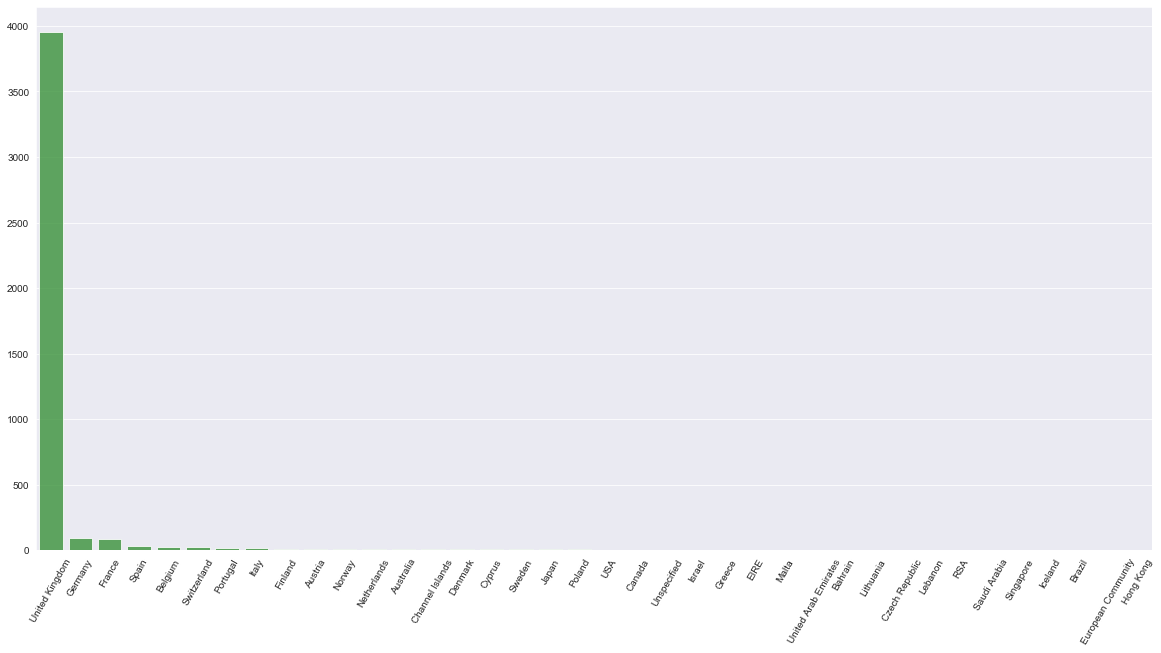

In [27]:
# Country wise Customer Distribution
Cust_country=data[['Country','CustomerID']].drop_duplicates()
#Calculating the distinct count of customer for each country
Cust_country_count=Cust_country.groupby(['Country'])['CustomerID'].aggregate('count').reset_index().sort_values('CustomerID',ascending=False)
#Plotting the count of customers
country=list(Cust_country_count['Country'])
Cust_id=list(Cust_country_count['CustomerID'])
plt.figure(figsize=(20,10))
sns.barplot(country, Cust_id, alpha=0.8, color=color[2])
plt.xticks(rotation='60')
plt.show()

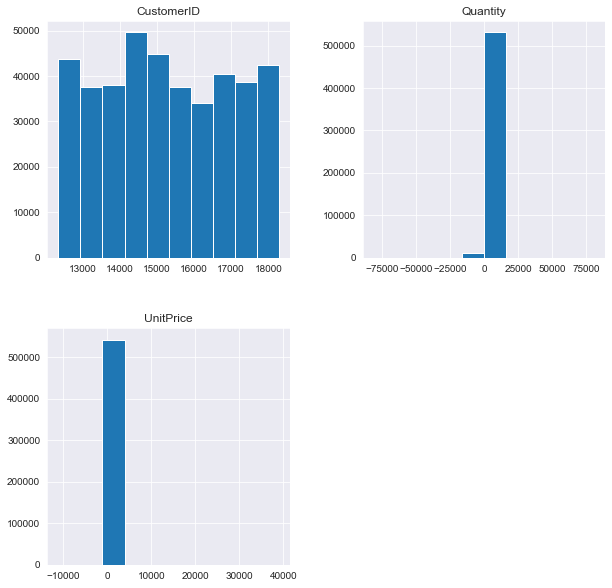

In [28]:
# Univariate Histograms
data.hist(figsize=(10,10))
plt.show()

In [29]:
## Adding new features 
# Total cost = Quantity * UnitPrice
data['total_cost'] = data['Quantity'] * data['UnitPrice']
data["InvoiceDate"] = pd.to_datetime(data["InvoiceDate"])
data_new = data.set_index(data["InvoiceDate"])
# WeekofYear: There are around 53 weeks in the year. This feature will describe which week of the year it is. 
data_new["WeekofYear"] = data_new.index.weekofyear
# Month: Month number [Jan - 1, Feb - 2, .... , Dec-12] 
data_new["Month"] = data_new.index.month_name()
# Time 
data_new["Time"] = data_new.index.time
# Day
data_new["Day"] = data_new.index.day
# Hour
data_new["Hour"] = data_new.index.hour
# WeekdayFlag
data_new["Weekday"] = data_new.index.weekday_name
# We can also include holiday flags such as ChristmasFlag,EasterFlag,etc. to keep track of important days. 
data_new.head(3)

InvoiceNo StockCode                         Description  \
InvoiceDate                                                                   
2010-12-01 08:26:00    536365    85123A  WHITE HANGING HEART T-LIGHT HOLDER   
2010-12-01 08:26:00    536365     71053                 WHITE METAL LANTERN   
2010-12-01 08:26:00    536365    84406B      CREAM CUPID HEARTS COAT HANGER   

                     Quantity         InvoiceDate  UnitPrice  CustomerID  \
InvoiceDate                                                                
2010-12-01 08:26:00         6 2010-12-01 08:26:00       2.55     17850.0   
2010-12-01 08:26:00         6 2010-12-01 08:26:00       3.39     17850.0   
2010-12-01 08:26:00         8 2010-12-01 08:26:00       2.75     17850.0   

                            Country  total_cost  WeekofYear     Month  \
InvoiceDate                                                             
2010-12-01 08:26:00  United Kingdom       15.30          48  December   
2010-12-01 08:26:00  United Kingdom       20.34          48  December   
2010-12-01 08:26:00  United Kingdom       22.00          48  December   

                         Time  Day  Hour    Weekday  
InvoiceDate                                          
2010-12-01 08:26:00  08:26:00    1     8  Wednesday  
2010-12-01 08:26:00  08:26:00    1     8  Wednesday  
2010-12-01 08:26:00  08:26:00    1     8  Wednesday

## Which is popular day for shopping ? 

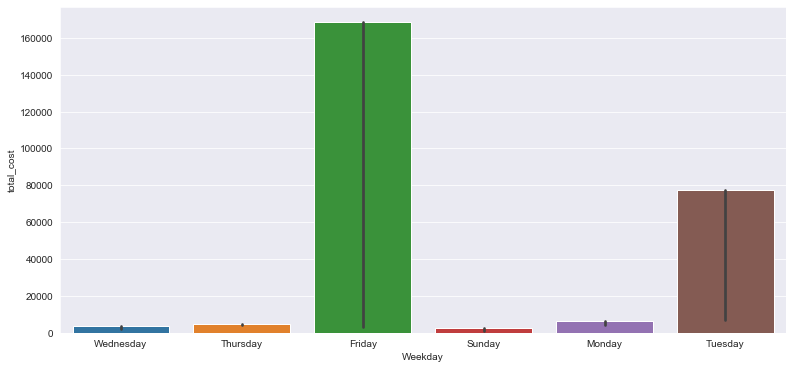

In [30]:
fig, ax = plt.subplots()
fig.set_size_inches(13, 6)
ax=sns.barplot(x='Weekday', y='total_cost',data=data_new,estimator=max,ax=ax)
plt.show()

Seems like people shop a lot on friday compared to other days of the week

## People shop at day or night?

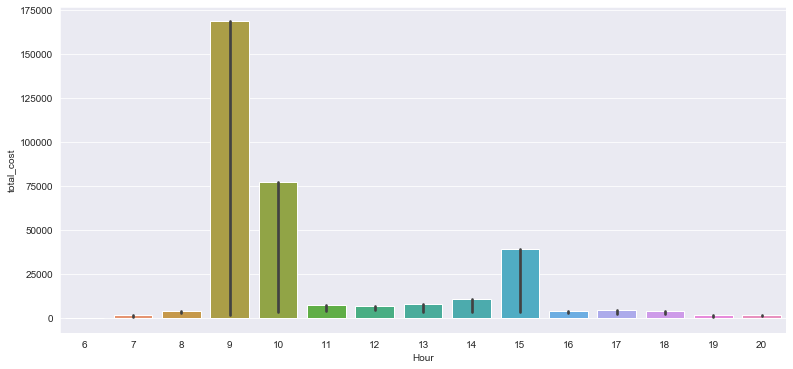

In [31]:
fig, ax = plt.subplots()
fig.set_size_inches(13, 6)
ax=sns.barplot(x='Hour', y='total_cost',data=data_new,estimator=max,ax=ax)
plt.show()

Seems like people shop a lot between morning 9-10 am and as well as around 3 pm. Which are usually break time at work. 

## Which is popular month for shopping?

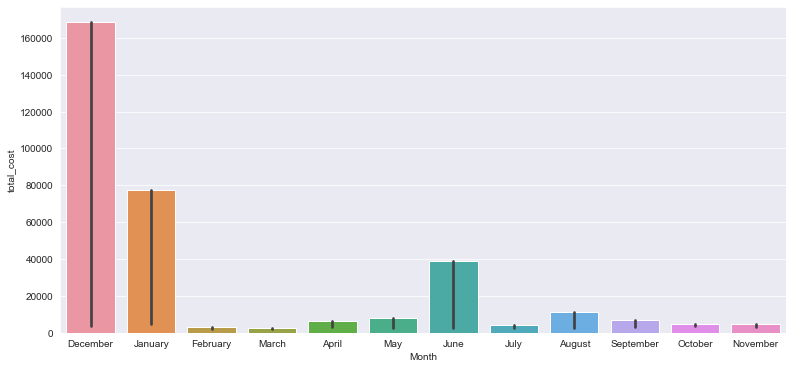

In [32]:
fig, ax = plt.subplots()
fig.set_size_inches(13, 6)
ax=sns.barplot(x='Month', y='total_cost',data=data_new,estimator=max,ax=ax)
plt.show()

December - January and June are most popular months for shopping. 

## What's the total revenue per country?

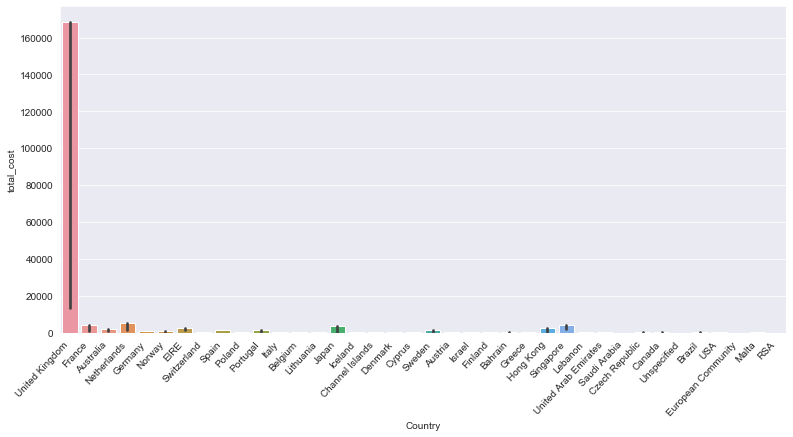

In [33]:
fig, ax = plt.subplots()
fig.set_size_inches(13, 6)
ax=sns.barplot(x='Country', y='total_cost',data=data,estimator=max,ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=47, ha="right")
plt.show()

## What are the products that are most bought in UK?

In [34]:
retail_uk = data[data['Country']=='United Kingdom']
groupedProduct = retail_uk.groupby('StockCode',as_index= False)['Quantity'].sum().sort_values(by='Quantity', ascending=False)
groupedProduct.head(10)

StockCode  Quantity
1145     22197     52928
2995     84077     48326
3511    85099B     43167
3532    85123A     36706
3302     84879     33519
1528     22616     25307
452      21212     24702
1126     22178     23242
83       17003     22801
964      21977     20288

In [35]:
invoice_quantity= retail_uk.groupby('InvoiceNo', as_index=False)['Quantity'].sum().sort_values(by='Quantity', ascending=False)
invoice_quantity.head()

InvoiceNo  Quantity
20090    581483     80995
2136     541431     74215
17136    574941     14149
17765    576365     13956
13770    567423     12572

It's important to know more about these most bought products. Is there any products that when one of them is bought, the other is bought too?

**Future Development**: "Market Basket Analysis" can be done to find out which products tend to be purchased together and which are most amenable to promotion.

In [36]:
# Total missing values
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
total_cost          0
dtype: int64

**There are 135,080 missing values in the CustomerID column, and since our analysis is based on customers, we will remove these missing values**

In [37]:
# Delete Rows with Null CustomerID
data = data[pd.notnull(data['CustomerID'])]
print(data.shape)

(406829, 9)


**According to above statistics summary, there are some negative values present in the Quantity and UnitPrice column. Thus, we will consider Quantity values greater than zero**

In [38]:
# Error correction for negavtive Quantity and UnitPrice
data = data[data.Quantity > 0]
data.shape

(397924, 9)

In [39]:
# Select Customers from the United Kingdom
data = data.loc[data.Country == 'United Kingdom']
print(data.shape)

(354345, 9)


In [40]:
# Check for missing values in the data
data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
total_cost     0
dtype: int64

## Clustering

**RFM (Recency, Frequency, Monetary)** analysis is a customer segmentation technique that uses past purchase behavior to divide customers into groups. RFM helps divide customers into various categories or clusters to identify customers who are more likely to respond to promotions and also for future personalization services.

- **RECENCY (R)**: Days since last purchase
- **FREQUENCY (F)**: Total number of purchases
- **MONETARY VALUE (M)**: Total money this customer spent. We will create those 3 customer attributes for each customer.

## Recency
To calculate recency, we need to choose a date point from which we evaluate how many days ago was the customer's last purchase.

In [41]:
#last date available in our dataset
data["InvoiceDate"] = pd.to_datetime(data["InvoiceDate"])
data["InvoiceDate"].max()

Timestamp('2011-12-09 12:49:00')

In [42]:
#create a new column called date which contains the date of invoice only
data['Date'] = data['InvoiceDate'].dt.date
data.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  total_cost  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom       15.30   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom       22.00   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34   

         Date  
0  2010-12-01  
1  2010-12-01  
2  2010-12-01  
3  2010-12-01  
4  2010-12-01

In [43]:
#group by customers and check last date of purshace
recency_df = data.groupby(by='CustomerID', as_index=False)['Date'].max()
recency_df.columns = ['CustomerID','LastPurshaceDate']
recency_df.head()

CustomerID LastPurshaceDate
0     12346.0       2011-01-18
1     12747.0       2011-12-07
2     12748.0       2011-12-09
3     12749.0       2011-12-06
4     12820.0       2011-12-06

In [44]:
#calculate recency
recency_df['Recency'] = recency_df['LastPurshaceDate'].apply(lambda x: (datetime.date(2011,12,9) - x).days)
#drop LastPurchaseDate as we don't need it anymore
recency_df.drop('LastPurshaceDate',axis=1,inplace=True)
recency_df.head()

CustomerID  Recency
0     12346.0      325
1     12747.0        2
2     12748.0        0
3     12749.0        3
4     12820.0        3

## Frequency

Frequency helps us to know how many times a customer purchased from us. To do that we need to check how many invoices are registered by the same customer.

In [45]:
# drop duplicates
retail_uk = data.copy()
retail_uk.drop_duplicates(subset=['InvoiceNo', 'CustomerID'], keep="first", inplace=True)
#calculate frequency of purchases
frequency_df = retail_uk.groupby(by=['CustomerID'], as_index=False)['InvoiceNo'].count()
frequency_df.columns = ['CustomerID','Frequency']
frequency_df.head()

CustomerID  Frequency
0     12346.0          1
1     12747.0         11
2     12748.0        210
3     12749.0          5
4     12820.0          4

## Monetary
Monetary attribute answers the question: How much money did the customer spent over time?

In [46]:
monetary_df = retail_uk.groupby(by='CustomerID',as_index=False).agg({'total_cost': 'sum'})
monetary_df.columns = ['CustomerID','Monetary']
monetary_df.head()

CustomerID  Monetary
0     12346.0  77183.60
1     12747.0    689.49
2     12748.0   3841.31
3     12749.0     98.35
4     12820.0     58.20

## Create RFM Table

In [47]:
#merge recency dataframe with frequency dataframe
temp_df = recency_df.merge(frequency_df,on='CustomerID')
#merge with monetary dataframe to get a table with the 3 columns
rfm_df = temp_df.merge(monetary_df,on='CustomerID')
#use CustomerID as index
rfm_df.set_index('CustomerID',inplace=True)
#check the head
rfm_df.head()

Recency  Frequency  Monetary
CustomerID                              
12346.0         325          1  77183.60
12747.0           2         11    689.49
12748.0           0        210   3841.31
12749.0           3          5     98.35
12820.0           3          4     58.20

In [48]:
rfm_df.describe()

Recency    Frequency       Monetary
count  3921.000000  3921.000000    3921.000000
mean     91.722265     4.246111     293.299913
std      99.528532     7.205750    3261.756525
min       0.000000     1.000000       0.000000
25%      17.000000     1.000000      17.700000
50%      50.000000     2.000000      45.400000
75%     142.000000     5.000000     124.500000
max     373.000000   210.000000  168471.250000

## Building Custom Segments

In [49]:
# Will calculate quartile value for each column and name then R, F, M
r_labels = range(4, 0, -1)
r_quartiles = pd.qcut(rfm_df['Recency'], 4, labels = r_labels,duplicates='drop')
rfm_df = rfm_df.assign(R = r_quartiles.values)
f_labels = range(1,4)
m_labels = range(1,5)
f_quartiles = pd.qcut(rfm_df['Frequency'], 4, labels = f_labels,duplicates='drop')
m_quartiles = pd.qcut(rfm_df['Monetary'], 4, labels = m_labels,duplicates='drop')
rfm_df = rfm_df.assign(F = f_quartiles.values)
rfm_df = rfm_df.assign(M = m_quartiles.values)
rfm_df.head()

Recency  Frequency  Monetary  R  F  M
CustomerID                                       
12346.0         325          1  77183.60  1  1  4
12747.0           2         11    689.49  4  3  4
12748.0           0        210   3841.31  4  3  4
12749.0           3          5     98.35  4  2  3
12820.0           3          4     58.20  4  2  3

In [50]:
rfm_df['M'].value_counts()

1    1015
4     980
3     980
2     946
Name: M, dtype: int64

In [51]:
#Concatenate RFM quartile values to RFM_Segment
# Sum RFM quartiles values to RFM_Score
def join_rfm(x): return str(x['R']) + str(x['F']) + str(x['M'])
rfm_df['RFM_Segment'] = rfm_df.apply(join_rfm, axis=1)
rfm_df['RFM_Score'] = rfm_df[['R','F','M']].sum(axis=1)
rfm_df.head()

Recency  Frequency  Monetary  R  F  M RFM_Segment  RFM_Score
CustomerID                                                              
12346.0         325          1  77183.60  1  1  4         114        6.0
12747.0           2         11    689.49  4  3  4         434       11.0
12748.0           0        210   3841.31  4  3  4         434       11.0
12749.0           3          5     98.35  4  2  3         423        9.0
12820.0           3          4     58.20  4  2  3         423        9.0

In [52]:
# largest segments
rfm_df['RFM_Segment'].value_counts()[:10]

111    410
434    370
112    268
211    246
311    202
212    198
323    160
223    146
423    143
334    140
Name: RFM_Segment, dtype: int64

In [53]:
# Select bottom RFM segment "111" and view top 5 rows
rfm_df[rfm_df['RFM_Segment']=='111'].tail()

Recency  Frequency  Monetary  R  F  M RFM_Segment  RFM_Score
CustomerID                                                              
18213.0         236          1     15.00  1  1  1         111        3.0
18224.0         263          1     10.20  1  1  1         111        3.0
18227.0         217          1     15.00  1  1  1         111        3.0
18250.0         310          1     14.85  1  1  1         111        3.0
18281.0         180          1      5.04  1  1  1         111        3.0

In [54]:
# Summary metrics per RFM Score
rfm_df.groupby('RFM_Score').agg({'Recency': 'mean','Frequency': 'mean','Monetary': ['mean','count'] }).round(1)

Recency Frequency Monetary      
             mean      mean     mean count
RFM_Score                                 
3.0         257.9       1.1     10.6   410
4.0         166.8       1.3     19.5   524
5.0         105.3       1.5     31.4   554
6.0          82.1       2.0    228.6   501
7.0          62.2       2.8    202.8   496
8.0          44.4       4.0    158.3   405
9.0          29.1       5.4    722.0   351
10.0         17.6       8.3    411.4   310
11.0          6.7      16.8   1237.6   370

In [55]:
# Use RFM score to group customers into Gold, Silver and Bronze segments
def segment_me(df):
    if df['RFM_Score'] >= 9:
        return 'Gold'
    elif (df['RFM_Score'] >= 5) and (df['RFM_Score'] < 9):
        return 'Silver'
    else:
        return 'Bronze'
    
rfm_df['General_Segment'] = rfm_df.apply(segment_me, axis=1)

rfm_df.groupby('General_Segment').agg({'Recency': 'mean','Frequency': 'mean','Monetary': ['mean','count']}).round(1)

Recency Frequency Monetary      
                   mean      mean     mean count
General_Segment                                 
Bronze            206.8       1.2     15.6   934
Gold               17.6      10.4    813.7  1031
Silver             75.8       2.5    151.6  1956

## Applying K-means clustering on RFM variables

### Key k-means assumptions:
1. Symmetric distribution of variables (not skewed)
2. Variables with same average values
3. Variables with same variance

In [56]:
rfm_df.describe()

Recency    Frequency       Monetary    RFM_Score
count  3921.000000  3921.000000    3921.000000  3921.000000
mean     91.722265     4.246111     293.299913     6.667432
std      99.528532     7.205750    3261.756525     2.478393
min       0.000000     1.000000       0.000000     3.000000
25%      17.000000     1.000000      17.700000     5.000000
50%      50.000000     2.000000      45.400000     6.000000
75%     142.000000     5.000000     124.500000     9.000000
max     373.000000   210.000000  168471.250000    11.000000

### K-means assumes equal mean and equal variance. It's not the case with RFM data

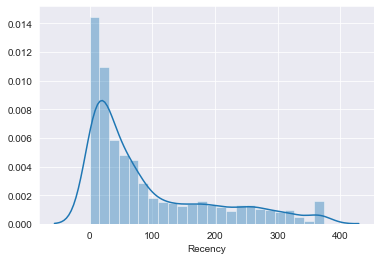

In [57]:
sns.distplot(rfm_df['Recency'])
plt.show()

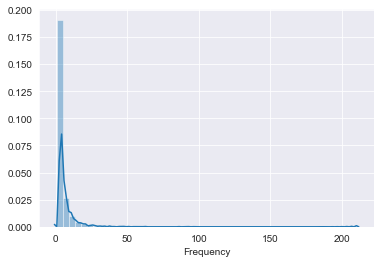

In [58]:
sns.distplot(rfm_df['Frequency'])
plt.show()

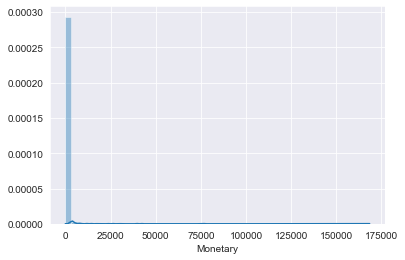

In [59]:
sns.distplot(rfm_df['Monetary'])
plt.show()

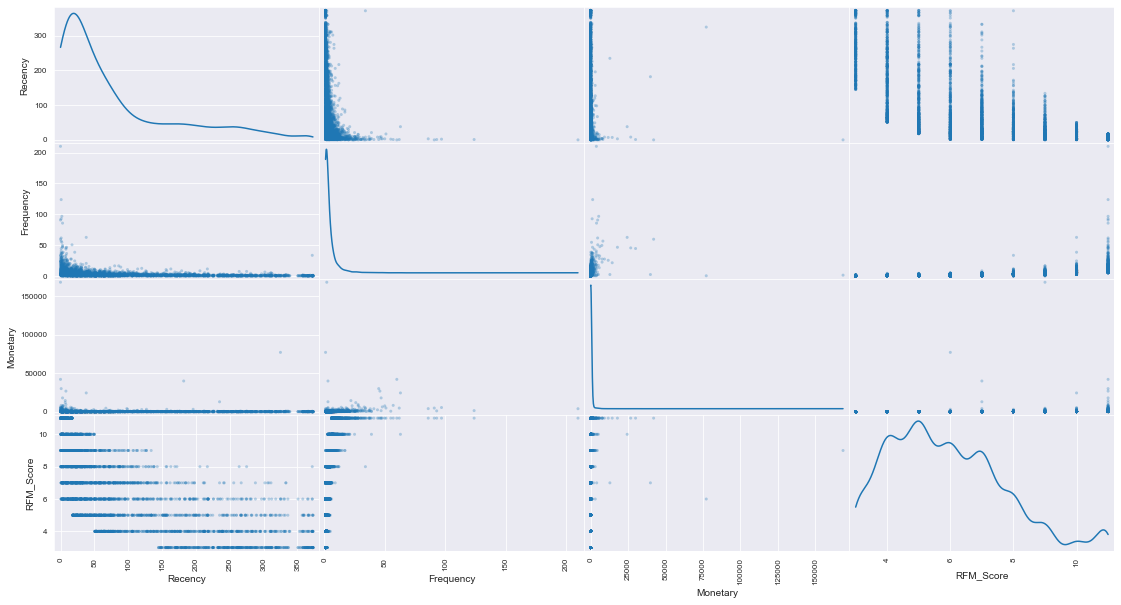

In [60]:
# Visualize feature distributions
# Scatter matrix for each pair of features in the data
from pandas.plotting import scatter_matrix
scatter_matrix(rfm_df, alpha = 0.3, figsize = (19,10), diagonal = 'kde');
plt.show()

Above plots shows skewed distribution. To fix this issue we need to apply log transformation on the data. There are some outliers present in the data and we can also notice that we have a skewed distribution of the 3 variables. It is important to use normally distributed data in clustering algorithms. In this case, we will have to perform normalization before passing data to clustering algorithm.

In [61]:
# Data Normalization using log transformation
rfm_r_log = np.log(rfm_df['Recency']+0.1) #can't take log(0) and so add a small number
rfm_f_log = np.log(rfm_df['Frequency'])
rfm_m_log = np.log(rfm_df['Monetary']+0.1)
log_data = pd.DataFrame({'Monetary': rfm_m_log,'Recency': rfm_r_log,'Frequency': rfm_f_log})
log_data.head()

Monetary   Recency  Frequency
CustomerID                                
12346.0     11.253944  5.784133   0.000000
12747.0      6.536097  0.741937   2.397895
12748.0      8.253595 -2.302585   5.347108
12749.0      4.589549  1.131402   1.609438
12820.0      4.065602  1.131402   1.386294

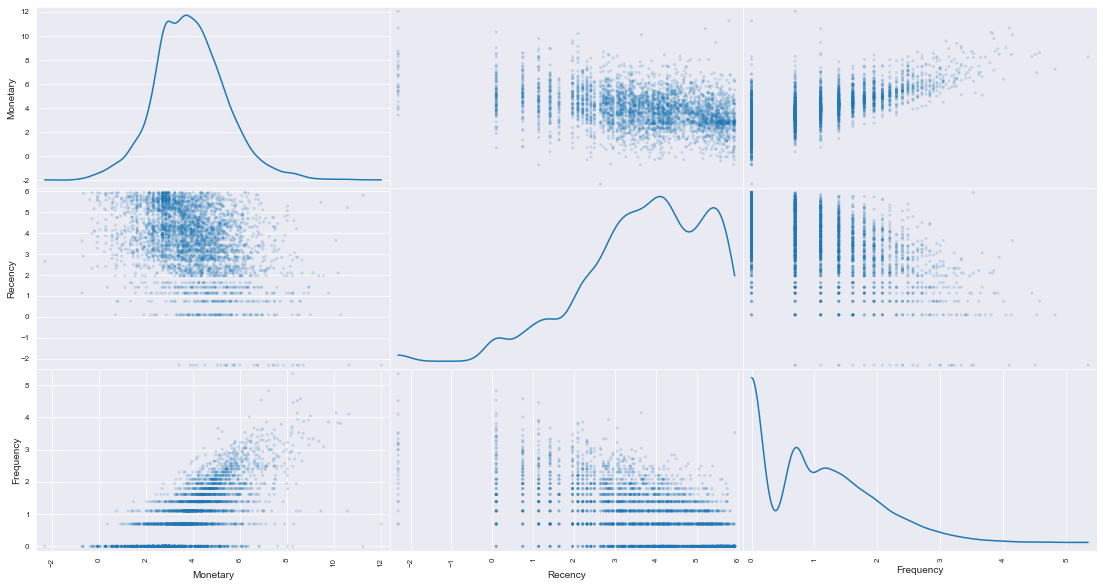

In [62]:
# Feature Distribution in the log_data
scatter_matrix(log_data, alpha = 0.2, figsize = (19,10), diagonal = 'kde');

In [63]:
log_data.describe()

Monetary      Recency    Frequency
count  3921.000000  3921.000000  3921.000000
mean      3.903984     3.724707     0.945316
std       1.529975     1.517406     0.900430
min      -2.302585    -2.302585     0.000000
25%       2.879198     2.839078     0.000000
50%       3.817712     3.914021     0.693147
75%       4.825109     4.956531     1.609438
max      12.034521     5.921846     5.347108

The distributions of Frequency and Monetary are better, more normalized, but it's not the case with Frequency Distribution, which is improved but not as much. Correlation matrix shows, Monetary and Frequency are more strongly correlated.

In [64]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(log_data)
datamart_normalized =  pd.DataFrame(scaler.transform(log_data))
datamart_normalized.columns = rfm_df.columns.tolist()[:3]

In [65]:
datamart_normalized.describe()

Recency     Frequency      Monetary
count  3.921000e+03  3.921000e+03  3.921000e+03
mean   2.512230e-16 -8.826163e-17  2.083615e-16
std    1.000128e+00  1.000128e+00  1.000128e+00
min   -4.057165e+00 -3.972610e+00 -1.049983e+00
25%   -6.698909e-01 -5.837208e-01 -1.049983e+00
50%   -5.639487e-02  1.247777e-01 -2.800891e-01
75%    6.021288e-01  8.118999e-01  7.376550e-01
max    5.314841e+00  1.448143e+00  4.889166e+00

## K-means Clustering

A common challenge with k-means is that you must tell it how many clusters you expect. Figuring out how many clusters we need is not obvious from data, thus we will try different clusters numbers and check their silhouette coefficient. The silhouette coefficient for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). The elbow method can be used to determine the number of clusters as well.<br>


### Find Optimum number of K using Elbow method

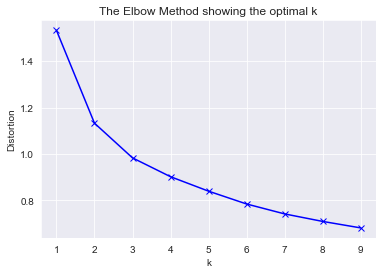

In [66]:
#from sklearn.cluster import KMeans
#from sklearn import metrics
from scipy.spatial.distance import cdist
#import numpy as np
#import matplotlib.pyplot as plt

# create new plot and data
plt.plot()
colors = ['b', 'g', 'r']
markers = ['o', 'v', 's']

# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(datamart_normalized.values)
    kmeanModel.fit(datamart_normalized.values)
    distortions.append(sum(np.min(cdist(datamart_normalized.values, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / rfm_df.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

## K==2

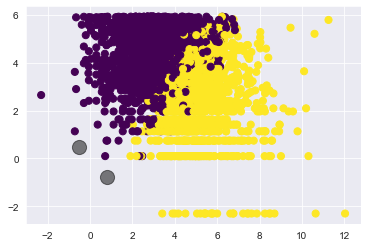

In [67]:
# Clustering 
n_clusters = 2
kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=30)
kmeans.fit(datamart_normalized.values)
clusters_customers = kmeans.predict(datamart_normalized.values)

plt.scatter(log_data.values[:, 0], log_data.values[:, 1], c=clusters_customers, s=50, cmap='viridis')
#select cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [68]:
# What's the number of customers in each cluster?
pd.DataFrame(pd.Series(clusters_customers).value_counts(), columns = ['NumberCustomers']).T

0     1
NumberCustomers  2401  1520

In [69]:
# money spent per cluster
result = rfm_df.copy()
result['Cluster'] = clusters_customers

In [70]:
result.groupby('Cluster').agg({'Recency': 'mean','Frequency': 'mean','Monetary': ['mean','count']}).round(1)

Recency Frequency Monetary      
           mean      mean     mean count
Cluster                                 
0         131.8       1.7     40.9  2401
1          28.5       8.3    692.0  1520

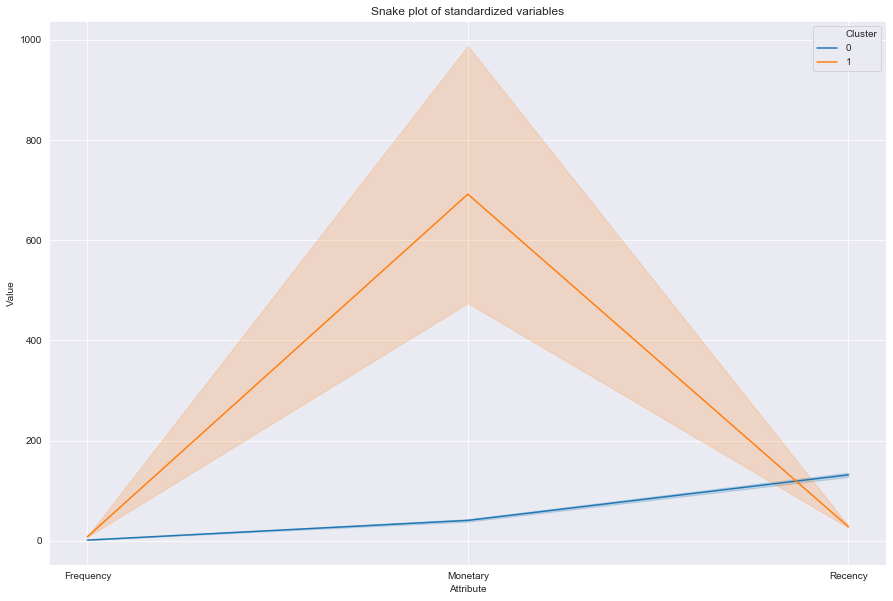

In [71]:
# snake plot
datamart_melt = pd.melt(result.reset_index(),
id_vars=['CustomerID','Cluster'],value_vars=['Recency','Frequency','Monetary'],var_name='Attribute',value_name='Value')
plt.figure(figsize=(15, 10))
plt.title('Snake plot of standardized variables')
sns.lineplot(x="Attribute", y="Value", hue='Cluster', data=datamart_melt)
plt.show()

## K = 3

In [72]:
# Clustering 
n_clusters = 3
kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=30)
kmeans.fit(datamart_normalized.values)
clusters_customers = kmeans.predict(datamart_normalized.values)
silhouette_avg = silhouette_score(datamart_normalized.values, clusters_customers)
print('Silhouette Score: {:<.3f}'.format(silhouette_avg))

Silhouette Score: 0.321


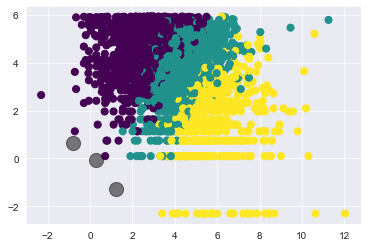

In [73]:
plt.scatter(log_data.values[:, 0], log_data.values[:, 1], c=clusters_customers, s=50, cmap='viridis')
#select cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [74]:
# What's the number of customers in each cluster?
pd.DataFrame(pd.Series(clusters_customers).value_counts(), columns = ['NumberCustomers']).T

0     1    2
NumberCustomers  1621  1583  717

In [75]:
# money spent per cluster
result = rfm_df.copy()
result['Cluster'] = clusters_customers

In [76]:
result.groupby('Cluster').agg({'Recency': 'mean','Frequency': 'mean','Monetary': ['mean','count']}).round(1)

Recency Frequency Monetary      
           mean      mean     mean count
Cluster                                 
0         156.2       1.2     22.8  1621
1          61.4       3.5    176.1  1583
2          12.8      12.6   1163.6   717

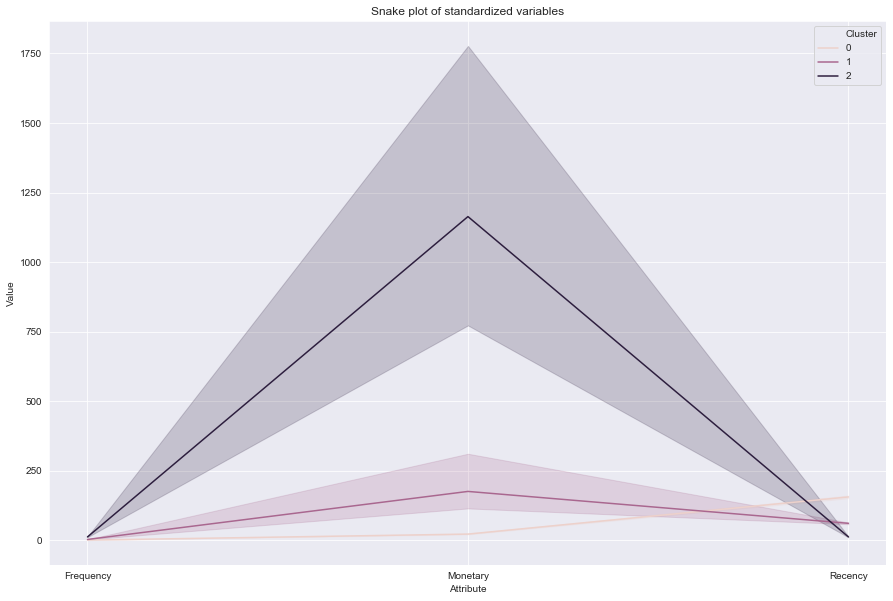

In [77]:
# snake plot
datamart_melt = pd.melt(result.reset_index(),
id_vars=['CustomerID','Cluster'],value_vars=['Recency','Frequency','Monetary'],var_name='Attribute',value_name='Value')
plt.figure(figsize=(15, 10))
plt.title('Snake plot of standardized variables')
sns.lineplot(x="Attribute", y="Value", hue='Cluster', data=datamart_melt)
plt.show()

In [78]:
import plotly 
# Use init_notebook_mode() to view the plots in jupyter notebook
plotly.offline.init_notebook_mode()
from plotly.graph_objs import Scatter,Layout,Bar,Histogram,Pie

trace1 = Scatter(x=result[result['Cluster']==0]['Recency'],y=result[result['Cluster']==0]['Frequency'],mode='markers',name='0-High Val')
trace2 = Scatter(x=result[result['Cluster']==1]['Recency'],y=result[result['Cluster']==1]['Frequency'],mode='markers',name='1-Low Val ')
trace3 = Scatter(x=result[result['Cluster']==2]['Recency'],y=result[result['Cluster']==2]['Frequency'],mode='markers',name='2-Mid Val')

# Create chart 
plotly.offline.iplot({
                         "data": [
                                  trace1,trace2,trace3
                                  ], 
                        "layout": Layout(title="<b>Recency vs Frequency</b>",xaxis= dict(
                                                        title= 'Recency',
                                                        zeroline= False,
                                                        gridcolor='rgb(183,183,183)',
                                                        showline=True
                                                    ),
                                                    yaxis=dict(
                                                         title= 'Frequency',
                                                        gridcolor='rgb(183,183,183)',
                                                        zeroline=False,
                                                        showline=True
                                                    ),font=dict(family='Courier New, monospace', size=12, color='rgb(0,0,0)'))
                                  })

In [79]:
trace1 = Scatter(x=result[result['Cluster']==0]['Frequency'],y=result[result['Cluster']==0]['Monetary'],mode='markers',name='Class 0')
trace2 = Scatter(x=result[result['Cluster']==1]['Frequency'],y=result[result['Cluster']==1]['Monetary'],mode='markers',name='Class 1')
trace3 = Scatter(x=result[result['Cluster']==2]['Frequency'],y=result[result['Cluster']==2]['Monetary'],mode='markers',name='Class 2')

# Create chart 
plotly.offline.iplot({
                         "data": [
                                  trace1,trace2,trace3
                                  ], 
                        "layout": Layout(title="<b>Frequency vs Monetary</b>",xaxis= dict(
                                                        title= 'Frequency',
                                                        zeroline= False,
                                                        gridcolor='rgb(183,183,183)',
                                                        showline=True
                                                    ),
                                                    yaxis=dict(
                                                        title= 'Monetary',
                                                        gridcolor='rgb(183,183,183)',
                                                        zeroline=False,
                                                        showline=True
                                                    ),font=dict(family='Courier New, monospace', size=12, color='rgb(0,0,0)'))
                                  })

In [80]:
trace1 = Scatter(x=result[result['Cluster']==0]['Recency'],y=result[result['Cluster']==0]['Monetary'],mode='markers',name='Class 0')
trace2 = Scatter(x=result[result['Cluster']==1]['Recency'],y=result[result['Cluster']==1]['Monetary'],mode='markers',name='Class 1')
trace3 = Scatter(x=result[result['Cluster']==2]['Recency'],y=result[result['Cluster']==2]['Monetary'],mode='markers',name='Class 2')

# Create chart 
plotly.offline.iplot({
                         "data": [
                                  trace1,trace2,trace3
                                  ], 
                        "layout": Layout(title="<b>Frequency vs Monetary</b>",xaxis= dict(
                                                        title= 'Frequency',
                                                        zeroline= False,
                                                        gridcolor='rgb(183,183,183)',
                                                        showline=True
                                                    ),
                                                    yaxis=dict(
                                                        title= 'Monetary',
                                                        gridcolor='rgb(183,183,183)',
                                                        zeroline=False,
                                                        showline=True
                                                    ),font=dict(family='Courier New, monospace', size=12, color='rgb(0,0,0)'))
                                  })

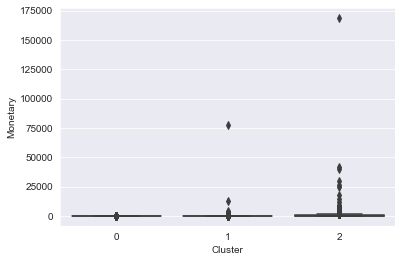

In [81]:
sns.boxplot(x = 'Cluster', y = 'Monetary', data = result) 
plt.show()

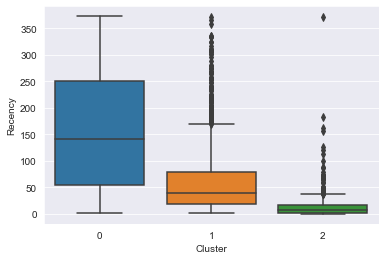

In [82]:
# Draw a vertical boxplot grouped  
# by a categorical variable: 
#sns.set_style("whitegrid") 
sns.boxplot(x = 'Cluster', y = 'Recency', data = result) 
plt.show()

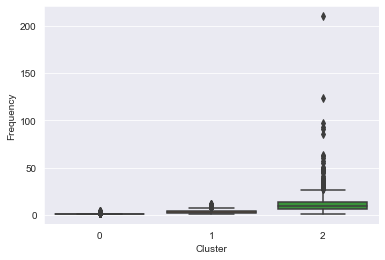

In [83]:
sns.boxplot(x = 'Cluster', y = 'Frequency', data = result) 
plt.show()


### Gaussian Mixture Model
While k-means is easy to understand and implement.It fails when dealing with non-circular shapes and lack of probabilistic cluster assignment—mean that for many datasets (especially low-dimensional datasets) it may not perform as well as you might hope.


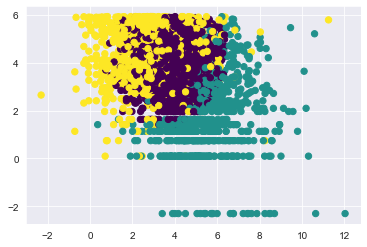

In [84]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3).fit(datamart_normalized.values)
labels = gmm.predict(datamart_normalized.values)
plt.scatter(log_data.values[:, 0], log_data.values[:, 1], c=labels, s=40, cmap='viridis');

The GMM didn't provide a better result at this level than k-means.

### DBSCAN 

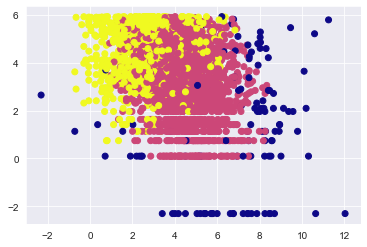

In [85]:
from sklearn.cluster import DBSCAN
# cluster the data into five clusters
dbscan = DBSCAN(eps=0.5, min_samples = 10)
clusters = dbscan.fit_predict(datamart_normalized.values)
# plot the cluster assignments
plt.scatter(log_data.values[:, 0], log_data.values[:, 1], c=clusters, cmap="plasma")


DBSCAN didn't provide a better result at this level than k-means.<br>

## Conclusion after implenting K-means
You can see how the segments are clearly differentiated from each other in terms of RFM.

We have created following segments using RFM analysis:

- Low Value: Customers who are less active than others, not very frequent buyer/visitor and generates very low - zero   maybe negative revenue.
- Mid Value: In the middle of everything. Often using our platform (but not as much as our High Values), fairly frequent and generates moderate revenue.
- High Value: The group we don’t want to lose. High Revenue, Frequency and low Inactivity.

We can start taking actions with this segmentation. The main strategies are quite clear:

- High Value: Improve Retention
- Mid Value: Improve Retention + Increase Frequency
- Low Value: Increase Frequency
